<a href="https://colab.research.google.com/github/AyanRoy22/Room_Occupancy_Detection/blob/main/Room_Occupency_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/My Drive/Colab Notebooks/Classification Project/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Classification Project/datatraining.txt')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Classification Project/datatest.txt')
val = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Classification Project/datatest2.txt')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB


In [ ]:
val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB


In [ ]:
train

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


In [ ]:
train.isna().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [ ]:
train.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [ ]:
train.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


<Axes: xlabel='Occupancy', ylabel='count'>

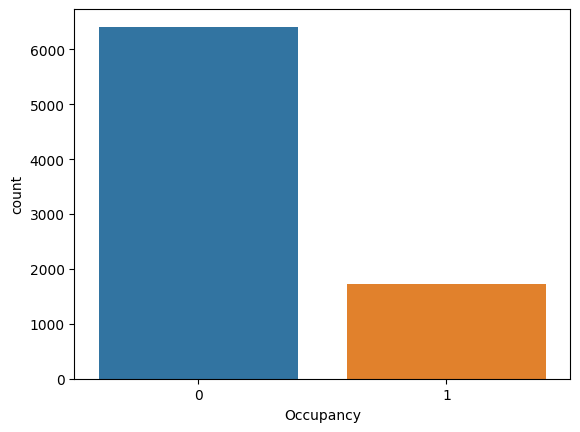

In [ ]:
sns.countplot(x ='Occupancy', data = train)
# The dataset is imbalanced

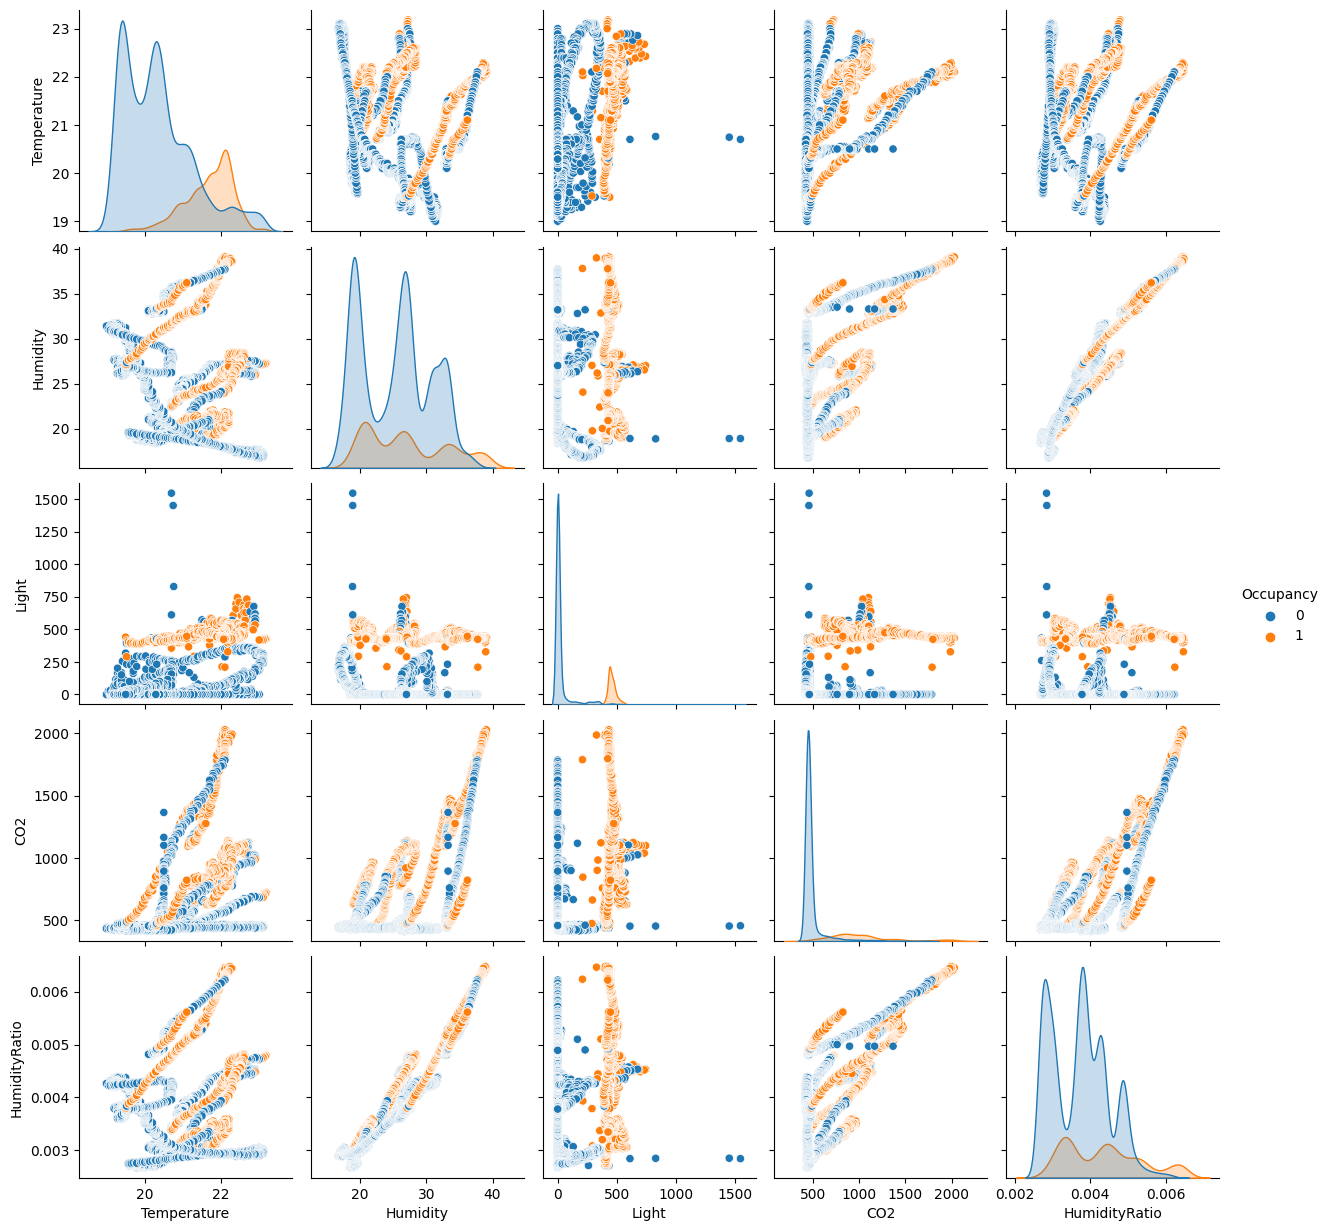

In [ ]:
sns.pairplot(train, diag_kind='kde', hue = 'Occupancy')

In [ ]:
train.corr()
# which correlation to use?

<ipython-input-47-a1bf52697753>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.141759,0.649942,0.559894,0.151762,0.538220
Humidity,-0.141759,1.000000,0.037828,0.439023,0.955198,0.132964
Light,0.649942,0.037828,1.000000,0.664022,0.230420,0.907352
CO2,0.559894,0.439023,0.664022,1.000000,0.626556,0.712235
HumidityRatio,0.151762,0.955198,0.230420,0.626556,1.000000,0.300282
Occupancy,0.538220,0.132964,0.907352,0.712235,0.300282,1.000000


<ipython-input-48-02974f9c7058>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrplot = sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)


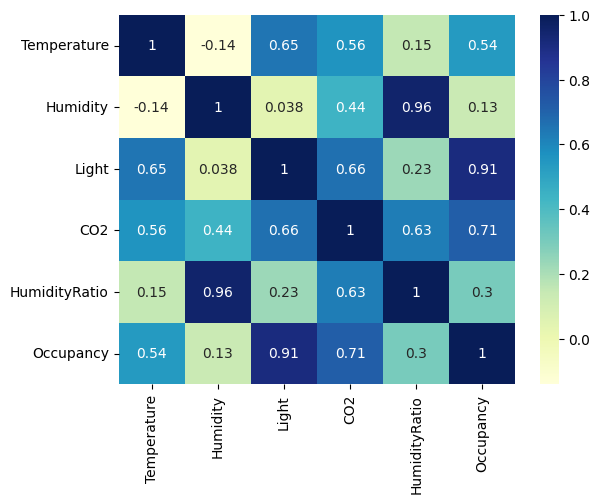

In [ ]:
corrplot = sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)
plt.show()

There is strong correlation between Light and Occupancy.
CO2 level also has high correlation with Occupancy.

Humidity and HumidityRatio have high correlation with each other. This leads to multicollinearity. So to avoid this we can drop one of these columns.

In [ ]:
train.drop(['Humidity','date'], axis=1)

,Temperature,Light,CO2,HumidityRatio,Occupancy
1,23.18,426.0,721.250000,0.004793,1
2,23.15,429.5,714.000000,0.004783,1
3,23.15,426.0,713.500000,0.004779,1
4,23.15,426.0,708.250000,0.004772,1
5,23.10,426.0,704.500000,0.004757,1
...,...,...,...,...,...
8139,21.05,433.0,787.250000,0.005579,1
8140,21.05,433.0,789.500000,0.005563,1
8141,21.10,433.0,798.500000,0.005596,1
8142,21.10,433.0,820.333333,0.005621,1


In [ ]:
duplicates = train[train.duplicated()]
print(duplicates)
# No duplicate values

Empty DataFrame
Columns: [date, Temperature, Humidity, Light, CO2, HumidityRatio, Occupancy]
Index: []


In [ ]:
model_1 = train[['CO2', 'Light',  'Occupancy']]

In [ ]:
model_2 = train[['Temperature', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']]

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pycaret-3.0.2-py3-none-any.whl (483 kB)
  Using cached pyod-1.0.9.tar.gz (149 kB)
  Preparing metadata (setup.py) ... done
  Using cached category_encoders-2.6.1-py2.py3-none-any.whl (81 kB)
  Using cached importlib_metadata-6.7.0-py3-none-any.whl (22 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
  Using cached xxhash-3.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (212 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl (79.9 MB)
  Using cached schemdraw-0.15-py3-none-any.whl (106 kB)
  Using cached plotly_resampler-0.8.3.2.tar.gz (46 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━

In [ ]:
from pycaret.classification import *
experiment = setup(model_1, target='Occupancy', fix_imbalance=True)

,Description,Value
0,Session id,4257
1,Target,Occupancy
2,Target type,Binary
3,Original data shape,"(8143, 3)"
4,Transformed data shape,"(11423, 3)"
5,Transformed train set shape,"(8980, 3)"
6,Transformed test set shape,"(2443, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9902,0.9983,0.9893,0.9655,0.9772,0.9709,0.9711,0.2750
rf,Random Forest Classifier,0.9895,0.9963,0.9917,0.9602,0.9756,0.9689,0.9692,1.5870
xgboost,Extreme Gradient Boosting,0.9895,0.9984,0.9876,0.9640,0.9756,0.9688,0.9690,0.3750
knn,K Neighbors Classifier,0.9884,0.9950,0.9934,0.9543,0.9734,0.9660,0.9664,0.1920
ada,Ada Boost Classifier,0.9884,0.9974,0.9950,0.9529,0.9734,0.9660,0.9665,1.0000
gbc,Gradient Boosting Classifier,0.9884,0.9981,0.9901,0.9572,0.9733,0.9659,0.9662,0.9390
lr,Logistic Regression,0.9881,0.9938,0.9967,0.9500,0.9727,0.9651,0.9656,0.4360
et,Extra Trees Classifier,0.9875,0.9970,0.9835,0.9591,0.9711,0.9631,0.9633,0.7470
dt,Decision Tree Classifier,0.9863,0.9814,0.9727,0.9633,0.9679,0.9592,0.9593,0.2000
nb,Naive Bayes,0.9788,0.9946,0.9975,0.9117,0.9525,0.9389,0.9406,0.2310


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

## Train, Test and Validation

In [ ]:
#from sklearn.model_selection import train_test_split

X_train = train[['Temperature', 'Light', 'CO2', 'HumidityRatio']]
#X_train1 = train[['Light', 'CO2']]
y_train = train[['Occupancy']]
X_test = test[['Temperature', 'Light', 'CO2', 'HumidityRatio']]
#X_test1 = test[['Light', 'CO2']]
y_test = test[['Occupancy']]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 1)

In [ ]:
X_val = val[['Temperature', 'Light', 'CO2', 'HumidityRatio']]
y_val = val[['Occupancy']]

### Logistic Regression

In [ ]:
accuracies = {}
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
acc = lr.score(X_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 97.86%


In [ ]:
acc = lr.score(X_train,y_train)*100

accuracies['Logistic Regression'] = acc
print("Train Accuracy {:.2f}%".format(acc))

Train Accuracy 98.60%


### Ada Boost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
acc = clf.score(X_test,y_test)*100

accuracies['AdaBoostClassifier'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 96.47%


In [ ]:
acc = clf.score(X_train,y_train)*100

accuracies['AdaBoostClassifier'] = acc
print("Train Accuracy {:.2f}%".format(acc))

Train Accuracy 99.63%


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clfr = RandomForestClassifier(max_depth=2, random_state=0)
clfr.fit(X_train, y_train)
y_pred = clfr.predict(X_test)
acc1 = clfr.score(X_test,y_test)*100

accuracies['Random Forest Classifier'] = acc1
print("Test Accuracy {:.2f}%".format(acc1))

Test Accuracy 97.86%


In [ ]:
acc1 = clfr.score(X_train,y_train)*100

accuracies['Random Forest Classifier'] = acc1
print("Train Accuracy {:.2f}%".format(acc1))

Train Accuracy 98.81%


In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.3 MB/s eta 0:00:00


In [ ]:
import optuna

In [ ]:
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.model_selection import cross_val_score
def kappa_score(y_test, y_pred):
    return cohen_kappa_score(y_test, y_pred)

Kappa = make_scorer(kappa_score)

In [ ]:
def objective(trial):
    param_space = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced', None])
    }
    clf = RandomForestClassifier(random_state = 1234, **param_space)
    clf.fit(X_train, y_train)
    return cross_val_score(clf, X_train, y_train, n_jobs=-1, cv=5, scoring=Kappa).mean()

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2023-06-20 13:30:14,356] A new study created in memory with name: no-name-a6a26b39-6287-4594-90a5-459e8e9c11b1
[I 2023-06-20 13:30:42,262] Trial 0 finished with value: 0.9123072771062543 and parameters: {'n_estimators': 500, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'log2', 'criterion': 'entropy', 'bootstrap': True, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9123072771062543.
[I 2023-06-20 13:31:15,325] Trial 1 finished with value: 0.8640397579039945 and parameters: {'n_estimators': 600, 'max_depth': 9, 'min_samples_split': 11, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'criterion': 'entropy', 'bootstrap': False, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9123072771062543.
[I 2023-06-20 13:31:25,150] Trial 2 finished with value: 0.8657407686094778 and parameters: {'n_estimators': 300, 'max_depth': 15, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'criterion': 'entropy', 'bootstrap': 

In [ ]:
study.best_params

{'n_estimators': 700,
 'max_depth': 3,
 'min_samples_split': 20,
 'min_samples_leaf': 10,
 'max_features': 'log2',
 'criterion': 'gini',
 'bootstrap': True,
 'class_weight': None}

In [ ]:
rfc_params = {'n_estimators': 600,
 'max_depth': 3,
 'min_samples_split': 12,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'criterion': 'gini',
 'bootstrap': True,
 'class_weight': None}

rfc = RandomForestClassifier(**rfc_params)

In [ ]:
rfc.fit(X_train,y_train)
rfc.score(X_test, y_test)*100

97.82363977485929

[[1639   54]
 [   3  969]]
0.9786116322701689


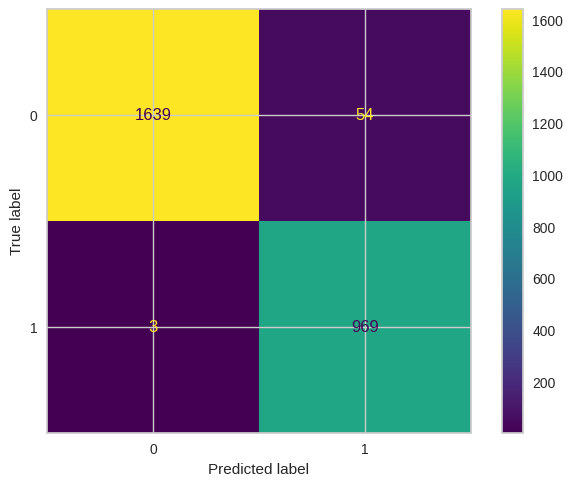

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#cm = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
print(cm)
print(metrics.accuracy_score(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
TP = cm[1,1] # true positive
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

total = TP+TN+FP+FN
Accuracy = (TP+TN)/total
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP)
F1_Score = 2*TP/(2*TP + FP + FN)
print(Accuracy, Specificity, Sensitivity, F1_Score)

0.9786116322701689 0.9681039574719433 0.9969135802469136 0.9714285714285714
